Award Amounts - Small Businesses

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Award Amounts Small Businesses.csv')
df

,total_obligated_amount,period_of_performance_start_date,contracting_officers_determination_of_business_size
0,567677.12,10/1/2001,SMALL BUSINESS
1,110418.75,2/6/2003,SMALL BUSINESS
2,29667.00,1/1/2004,SMALL BUSINESS
3,108960.00,6/1/2004,SMALL BUSINESS
4,54180.00,10/1/2004,SMALL BUSINESS
...,...,...,...
9451,72826.00,9/18/2021,SMALL BUSINESS
9452,53700.00,9/18/2021,SMALL BUSINESS
9453,14049.60,9/20/2021,SMALL BUSINESS
9454,16758.00,9/24/2021,SMALL BUSINESS


In [3]:
df["period_of_performance_start_date"] = pd.to_datetime(df["period_of_performance_start_date"], format='%m/%d/%Y')
df["period_of_performance_start_date"] = df["period_of_performance_start_date"].dt.year
df

,total_obligated_amount,period_of_performance_start_date,contracting_officers_determination_of_business_size
0,567677.12,2001,SMALL BUSINESS
1,110418.75,2003,SMALL BUSINESS
2,29667.00,2004,SMALL BUSINESS
3,108960.00,2004,SMALL BUSINESS
4,54180.00,2004,SMALL BUSINESS
...,...,...,...
9451,72826.00,2021,SMALL BUSINESS
9452,53700.00,2021,SMALL BUSINESS
9453,14049.60,2021,SMALL BUSINESS
9454,16758.00,2021,SMALL BUSINESS


In [4]:
years = df["period_of_performance_start_date"].unique()
years

array([2001, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [5]:
list1 = list(years)
list2 = list(df.groupby("period_of_performance_start_date")["total_obligated_amount"].mean())
condensed_df = pd.DataFrame(zip(list1, list2), columns=["Year", "Average Award Amount"])
condensed_df

,Year,Average Award Amount
0,2001,567677.120000
1,2003,110418.750000
2,2004,64269.000000
3,2005,66122.292000
4,2006,119261.900000
5,2007,116334.351224
6,2008,94321.410826
7,2009,82135.169369
8,2010,82129.267152
9,2011,79552.153082


Text(0.5, 1.0, 'Exhibit 1: Average Award Amount for Small Businesses Over Time (2001-2021)')

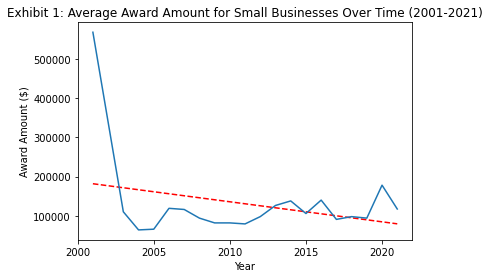

In [6]:
z = np.polyfit(condensed_df["Year"], condensed_df["Average Award Amount"], 1)
p = np.poly1d(z)

plt.plot(condensed_df["Year"], p(condensed_df["Year"]), "r--")
plt.plot(condensed_df["Year"], condensed_df["Average Award Amount"])
plt.xticks(np.arange(2000, 2025, 5))
plt.xlabel("Year")
plt.ylabel("Award Amount ($)")
plt.title("Exhibit 1: Average Award Amount for Small Businesses Over Time (2001-2021)")

In [7]:
condensed_df_2008_and_beyond = condensed_df[condensed_df["Year"] >= 2008].reset_index(drop=True)
condensed_df_2008_and_beyond

,Year,Average Award Amount
0,2008,94321.410826
1,2009,82135.169369
2,2010,82129.267152
3,2011,79552.153082
4,2012,98194.827145
5,2013,126568.756436
6,2014,138102.976133
7,2015,106012.701307
8,2016,140203.244548
9,2017,91078.670488


Text(0.5, 1.0, 'Exhibit 2: Average Award Amount for Small Businesses Over Time (2008-2021)')

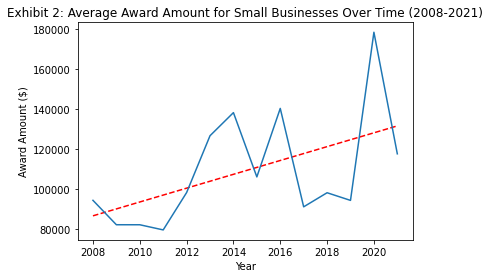

In [8]:
z = np.polyfit(condensed_df_2008_and_beyond["Year"], condensed_df_2008_and_beyond["Average Award Amount"], 1)
p = np.poly1d(z)

plt.plot(condensed_df_2008_and_beyond["Year"], p(condensed_df_2008_and_beyond["Year"]), "r--")
plt.plot(condensed_df_2008_and_beyond["Year"], condensed_df_2008_and_beyond["Average Award Amount"])
plt.xlabel("Year")
plt.ylabel("Award Amount ($)")
plt.title("Exhibit 2: Average Award Amount for Small Businesses Over Time (2008-2021)")

Recipient Types with Award Amounts

In [9]:
df2 = pd.read_csv('Recipient Types.csv')
df2

,period_of_performance_start_date,veteran_owned_business,woman_owned_business,minority_owned_business
0,10/1/2001,t,t,t
1,2/6/2003,t,f,f
2,1/1/2004,f,t,f
3,6/1/2004,f,t,f
4,10/1/2004,f,t,t
...,...,...,...,...
9451,9/18/2021,t,f,f
9452,9/18/2021,t,f,t
9453,9/20/2021,f,t,f
9454,9/24/2021,t,f,t


In [10]:
df2["period_of_performance_start_date"] = pd.to_datetime(df2["period_of_performance_start_date"], format='%m/%d/%Y')
df2["period_of_performance_start_date"] = df2["period_of_performance_start_date"].dt.year
df2

,period_of_performance_start_date,veteran_owned_business,woman_owned_business,minority_owned_business
0,2001,t,t,t
1,2003,t,f,f
2,2004,f,t,f
3,2004,f,t,f
4,2004,f,t,t
...,...,...,...,...
9451,2021,t,f,f
9452,2021,t,f,t
9453,2021,f,t,f
9454,2021,t,f,t


In [11]:
condensed_df2 = df2[df2["period_of_performance_start_date"] >= 2008].reset_index(drop=True)
condensed_df2

,period_of_performance_start_date,veteran_owned_business,woman_owned_business,minority_owned_business
0,2008,f,t,f
1,2008,t,f,f
2,2008,f,t,f
3,2008,t,f,f
4,2008,t,f,f
...,...,...,...,...
9336,2021,t,f,f
9337,2021,t,f,t
9338,2021,f,t,f
9339,2021,t,f,t


In [12]:
condensed_df2["veteran_owned_business"] = condensed_df2["veteran_owned_business"].astype(str).replace(to_replace=["f", "t"], value=[0, 1])
condensed_df2["woman_owned_business"] = condensed_df2["woman_owned_business"].astype(str).replace(to_replace=["f", "t"], value=[0, 1])
condensed_df2["minority_owned_business"] = condensed_df2["minority_owned_business"].astype(str).replace(to_replace=["f", "t"], value=[0, 1])
condensed_df2

,period_of_performance_start_date,veteran_owned_business,woman_owned_business,minority_owned_business
0,2008,0,1,0
1,2008,1,0,0
2,2008,0,1,0
3,2008,1,0,0
4,2008,1,0,0
...,...,...,...,...
9336,2021,1,0,0
9337,2021,1,0,1
9338,2021,0,1,0
9339,2021,1,0,1


In [13]:
business_counts = condensed_df2.groupby("period_of_performance_start_date")[["veteran_owned_business", "woman_owned_business", "minority_owned_business"]].sum().reset_index()
business_counts.rename(columns = {'period_of_performance_start_date':'Year'}, inplace=True)
business_counts

,Year,veteran_owned_business,woman_owned_business,minority_owned_business
0,2008,94,139,74
1,2009,168,233,97
2,2010,338,458,204
3,2011,359,380,171
4,2012,459,295,112
5,2013,626,597,271
6,2014,789,653,301
7,2015,721,746,285
8,2016,595,611,206
9,2017,377,360,153


In [14]:
df3 = pd.read_csv('Recipient Types with Award Amounts.csv')
df3

,period_of_performance_start_date,veteran_owned_business,woman_owned_business,minority_owned_business,total_obligated_amount
0,10/1/2001,t,t,t,567677.12
1,2/6/2003,t,f,f,110418.75
2,1/1/2004,f,t,f,29667.00
3,6/1/2004,f,t,f,108960.00
4,10/1/2004,f,t,t,54180.00
...,...,...,...,...,...
9451,9/18/2021,t,f,f,72826.00
9452,9/18/2021,t,f,t,53700.00
9453,9/20/2021,f,t,f,14049.60
9454,9/24/2021,t,f,t,16758.00


In [15]:
df3["period_of_performance_start_date"] = pd.to_datetime(df3["period_of_performance_start_date"], format='%m/%d/%Y')
df3["period_of_performance_start_date"] = df3["period_of_performance_start_date"].dt.year
df3

,period_of_performance_start_date,veteran_owned_business,woman_owned_business,minority_owned_business,total_obligated_amount
0,2001,t,t,t,567677.12
1,2003,t,f,f,110418.75
2,2004,f,t,f,29667.00
3,2004,f,t,f,108960.00
4,2004,f,t,t,54180.00
...,...,...,...,...,...
9451,2021,t,f,f,72826.00
9452,2021,t,f,t,53700.00
9453,2021,f,t,f,14049.60
9454,2021,t,f,t,16758.00


In [16]:
condensed_df3 = df3[df3["period_of_performance_start_date"] >= 2008].reset_index(drop=True)
condensed_df3

,period_of_performance_start_date,veteran_owned_business,woman_owned_business,minority_owned_business,total_obligated_amount
0,2008,f,t,f,5488.37
1,2008,t,f,f,4287.35
2,2008,f,t,f,420.00
3,2008,t,f,f,21212.60
4,2008,t,f,f,40685.00
...,...,...,...,...,...
9336,2021,t,f,f,72826.00
9337,2021,t,f,t,53700.00
9338,2021,f,t,f,14049.60
9339,2021,t,f,t,16758.00


In [17]:
condensed_df3_veterans = condensed_df3[["period_of_performance_start_date", "veteran_owned_business", "total_obligated_amount"]]
condensed_df3_women = condensed_df3[["period_of_performance_start_date", "woman_owned_business", "total_obligated_amount"]]
condensed_df3_minorities = condensed_df3[["period_of_performance_start_date", "minority_owned_business", "total_obligated_amount"]]

condensed_df3_veterans = condensed_df3_veterans[condensed_df3_veterans["veteran_owned_business"].astype(str) == "t"].reset_index(drop=True)
condensed_df3_women = condensed_df3_women[condensed_df3_women["woman_owned_business"].astype(str) == "t"].reset_index(drop=True)
condensed_df3_minorities = condensed_df3_minorities[condensed_df3_minorities["minority_owned_business"].astype(str) == "t"].reset_index(drop=True)

In [18]:
list1 = list(condensed_df3_veterans["period_of_performance_start_date"].unique())
list2 = list(condensed_df3_veterans.groupby("period_of_performance_start_date")["total_obligated_amount"].mean())
veterans_award_amounts = pd.DataFrame(zip(list1, list2), columns=["Year", "Average Award Amount"])
veterans_award_amounts

,Year,Average Award Amount
0,2008,143377.080213
1,2009,99741.174405
2,2010,120438.055976
3,2011,103066.729499
4,2012,91903.599673
5,2013,166064.596326
6,2014,180382.285602
7,2015,143102.495964
8,2016,211328.641630
9,2017,104089.652812


In [19]:
list1 = list(condensed_df3_women["period_of_performance_start_date"].unique())
list2 = list(condensed_df3_women.groupby("period_of_performance_start_date")["total_obligated_amount"].mean())
women_award_amounts = pd.DataFrame(zip(list1, list2), columns=["Year", "Average Award Amount"])
women_award_amounts

,Year,Average Award Amount
0,2008,62429.877914
1,2009,70377.005193
2,2010,60933.391856
3,2011,56756.773816
4,2012,92983.612373
5,2013,86149.572496
6,2014,79493.333890
7,2015,69062.819584
8,2016,72856.587447
9,2017,76945.018806


In [20]:
list1 = list(condensed_df3_minorities["period_of_performance_start_date"].unique())
list2 = list(condensed_df3_minorities.groupby("period_of_performance_start_date")["total_obligated_amount"].mean())
minorities_award_amounts = pd.DataFrame(zip(list1, list2), columns=["Year", "Average Award Amount"])
minorities_award_amounts

,Year,Average Award Amount
0,2008,104823.575270
1,2009,81893.273299
2,2010,103752.044412
3,2011,77368.974035
4,2012,154914.051429
5,2013,293221.705830
6,2014,262836.897575
7,2015,179846.770947
8,2016,143894.416650
9,2017,58964.061699


Text(0.5, 1.0, 'Exhibit 3: Recipient Types Drilled Down (2008-2021)')

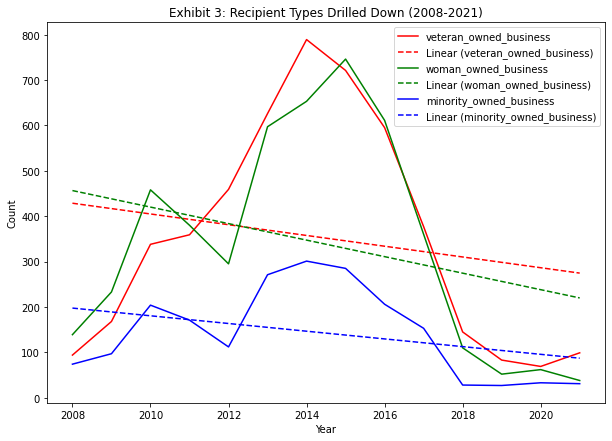

In [21]:
z = np.polyfit(business_counts["Year"], business_counts["veteran_owned_business"], 1)
p = np.poly1d(z)

z2 = np.polyfit(business_counts["Year"], business_counts["woman_owned_business"], 1)
p2 = np.poly1d(z2)

z3 = np.polyfit(business_counts["Year"], business_counts["minority_owned_business"], 1)
p3 = np.poly1d(z3)

plt.figure(figsize=(10,7))
plt.plot(business_counts["Year"], business_counts["veteran_owned_business"], color="r", label="veteran_owned_business")
plt.plot(business_counts["Year"], p(business_counts["Year"]), "r--", label="Linear (veteran_owned_business)")
plt.plot(business_counts["Year"], business_counts["woman_owned_business"], color="g", label="woman_owned_business")
plt.plot(business_counts["Year"], p2(business_counts["Year"]), "g--", label="Linear (woman_owned_business)")
plt.plot(business_counts["Year"], business_counts["minority_owned_business"], color="b", label="minority_owned_business")
plt.plot(business_counts["Year"], p3(business_counts["Year"]), "b--", label="Linear (minority_owned_business)")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Exhibit 3: Recipient Types Drilled Down (2008-2021)")

Text(0.5, 1.0, 'Exhibit 4: Veteran-Owned Businesses (2008-2021)')

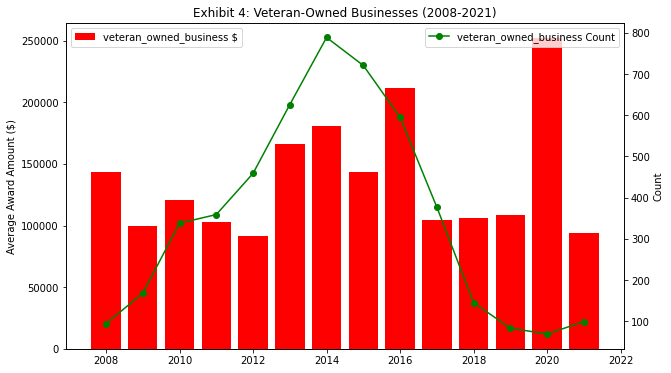

In [22]:
plt.figure(figsize=(10,6))
veteran_award_amounts = plt.bar(veterans_award_amounts["Year"], veterans_award_amounts["Average Award Amount"], color="r", label="veteran_owned_business $")
plt.ylabel("Average Award Amount ($)")
plt.legend(loc="upper left")

plt.twinx()
veteran_counts = plt.plot(business_counts["Year"], business_counts["veteran_owned_business"], "o-", color="g", label="veteran_owned_business Count")
plt.ylabel("Count")
plt.legend()

plt.title("Exhibit 4: Veteran-Owned Businesses (2008-2021)")

Text(0.5, 1.0, 'Exhibit 5: Women-Owned Businesses (2008-2021)')

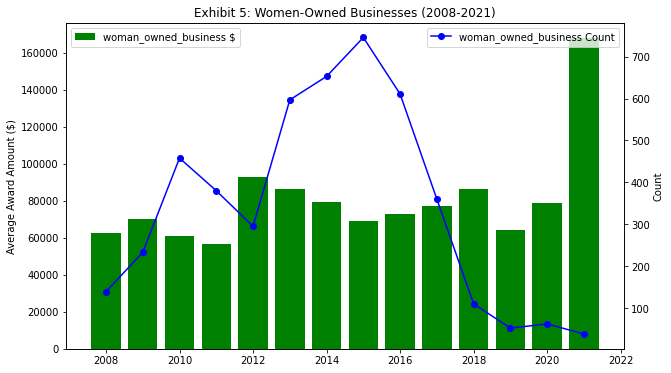

In [23]:
plt.figure(figsize=(10,6))
women_award_amounts = plt.bar(women_award_amounts["Year"], women_award_amounts["Average Award Amount"], color="g", label="woman_owned_business $")
plt.ylabel("Average Award Amount ($)")
plt.legend(loc="upper left")

plt.twinx()
women_counts = plt.plot(business_counts["Year"], business_counts["woman_owned_business"], "o-", color="b", label="woman_owned_business Count")
plt.ylabel("Count")
plt.legend()

plt.title("Exhibit 5: Women-Owned Businesses (2008-2021)")

Text(0.5, 1.0, 'Exhibit 6: Minority-Owned Businesses (2008-2021)')

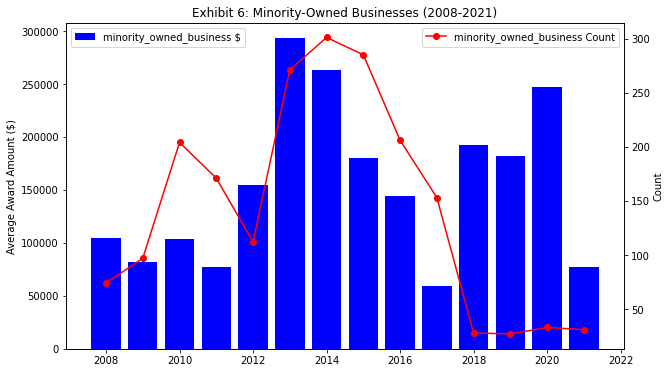

In [24]:
plt.figure(figsize=(10,6))
minority_award_amounts = plt.bar(minorities_award_amounts["Year"], minorities_award_amounts["Average Award Amount"], color="b", label="minority_owned_business $")
plt.ylabel("Average Award Amount ($)")
plt.legend(loc="upper left")

plt.twinx()
minority_counts = plt.plot(business_counts["Year"], business_counts["minority_owned_business"], "o-", color="r", label="minority_owned_business Count")
plt.ylabel("Count")
plt.legend()

plt.title("Exhibit 6: Minority-Owned Businesses (2008-2021)")

Types of Set Aside

In [25]:
df4 = pd.read_csv('Types of Set Aside.csv')
df4

,period_of_performance_start_date,type_of_set_aside,economically_disadvantaged_women_owned_small_business
0,10/1/2001,SMALL BUSINESS SET ASIDE - TOTAL,f
1,2/6/2003,SMALL BUSINESS SET ASIDE - TOTAL,f
2,10/1/2003,SMALL BUSINESS SET ASIDE - TOTAL,f
3,1/1/2004,SMALL BUSINESS SET ASIDE - TOTAL,f
4,6/1/2004,SMALL BUSINESS SET ASIDE - TOTAL,f
...,...,...,...
35944,11/1/2021,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f
35945,11/8/2021,SMALL BUSINESS SET ASIDE - TOTAL,f
35946,2/15/2022,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f
35947,3/7/2022,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f


In [26]:
print(df4.isna().sum())
df4.dropna()

period_of_performance_start_date                         0
type_of_set_aside                                        1
economically_disadvantaged_women_owned_small_business    0
dtype: int64


,period_of_performance_start_date,type_of_set_aside,economically_disadvantaged_women_owned_small_business
0,10/1/2001,SMALL BUSINESS SET ASIDE - TOTAL,f
1,2/6/2003,SMALL BUSINESS SET ASIDE - TOTAL,f
2,10/1/2003,SMALL BUSINESS SET ASIDE - TOTAL,f
3,1/1/2004,SMALL BUSINESS SET ASIDE - TOTAL,f
4,6/1/2004,SMALL BUSINESS SET ASIDE - TOTAL,f
...,...,...,...
35944,11/1/2021,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f
35945,11/8/2021,SMALL BUSINESS SET ASIDE - TOTAL,f
35946,2/15/2022,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f
35947,3/7/2022,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f


In [27]:
df4["period_of_performance_start_date"] = pd.to_datetime(df4["period_of_performance_start_date"], format='%m/%d/%Y')
df4["period_of_performance_start_date"] = df4["period_of_performance_start_date"].dt.year
df4 = df4[(df4["period_of_performance_start_date"] >= 2008) & (df4["period_of_performance_start_date"] < 2022)].reset_index(drop=True)
df4

,period_of_performance_start_date,type_of_set_aside,economically_disadvantaged_women_owned_small_business
0,2008,SDVOSB SOLE SOURCE,f
1,2008,SMALL BUSINESS SET ASIDE - TOTAL,f
2,2008,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f
3,2008,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f
4,2008,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f
...,...,...,...
35717,2021,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f
35718,2021,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f
35719,2021,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f
35720,2021,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,f


In [28]:
df4["economically_disadvantaged_women_owned_small_business"] = df4["economically_disadvantaged_women_owned_small_business"].astype(str).replace(to_replace=["f", "t"], value=[0, 1]).astype(int)
sum_EDWOSB = df4["economically_disadvantaged_women_owned_small_business"].sum()
sum_EDWOSB

700

In [29]:
set_aside_counts = df4["type_of_set_aside"].value_counts()
set_aside_counts

SERVICE DISABLED VETERAN OWNED SMALL BUSINESS SET-ASIDE    18178
SMALL BUSINESS SET ASIDE - TOTAL                           11999
SDVOSB SOLE SOURCE                                          2769
VETERAN SET ASIDE                                           1399
SMALL BUSINESS SET ASIDE - PARTIAL                          1104
VETERAN SOLE SOURCE                                          196
WOMEN OWNED SMALL BUSINESS                                    55
EMERGING SMALL BUSINESS SET ASIDE                             21
Name: type_of_set_aside, dtype: int64

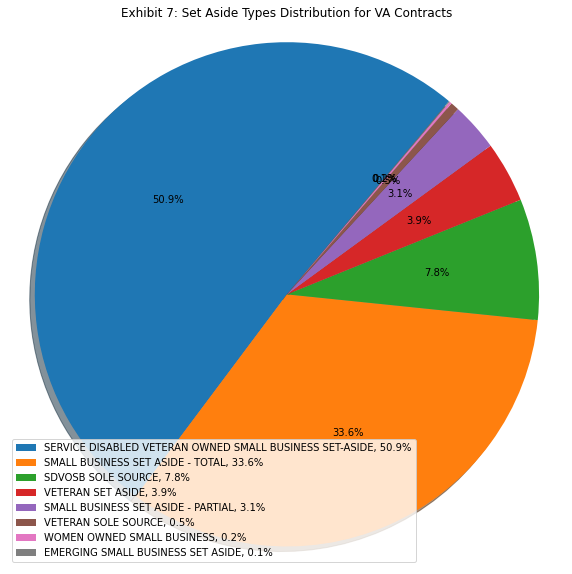

In [30]:
labels = list(set_aside_counts.index)
counts = list(set_aside_counts.values)
labels_with_percents = [f'{l}, {(c/35721)*100:0.1f}%' for l, c in zip(labels, counts)]

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(counts, autopct='%1.1f%%', shadow=True, startangle=50)
ax.legend(labels_with_percents, loc="best")
ax.axis('equal')
ax.set_title("Exhibit 7: Set Aside Types Distribution for VA Contracts")
plt.show()

Analysis for Top 5 Set Aside Types

In [31]:
df5 = pd.read_csv('Top 5 Set Aside Types with Award Amounts.csv')
df5

,period_of_performance_start_date,type_of_set_aside,total_obligated_amount
0,10/1/2001,SMALL BUSINESS SET ASIDE - TOTAL,567677.12
1,2/6/2003,SMALL BUSINESS SET ASIDE - TOTAL,110418.75
2,10/1/2003,SMALL BUSINESS SET ASIDE - TOTAL,0.00
3,1/1/2004,SMALL BUSINESS SET ASIDE - TOTAL,29667.00
4,6/1/2004,SMALL BUSINESS SET ASIDE - TOTAL,108960.00
...,...,...,...
35944,11/1/2021,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,78383.00
35945,11/8/2021,SMALL BUSINESS SET ASIDE - TOTAL,746720.00
35946,2/15/2022,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,689425.20
35947,3/7/2022,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,158394.90


In [32]:
df5["period_of_performance_start_date"] = pd.to_datetime(df5["period_of_performance_start_date"], format='%m/%d/%Y')
df5["period_of_performance_start_date"] = df5["period_of_performance_start_date"].dt.year
df5

,period_of_performance_start_date,type_of_set_aside,total_obligated_amount
0,2001,SMALL BUSINESS SET ASIDE - TOTAL,567677.12
1,2003,SMALL BUSINESS SET ASIDE - TOTAL,110418.75
2,2003,SMALL BUSINESS SET ASIDE - TOTAL,0.00
3,2004,SMALL BUSINESS SET ASIDE - TOTAL,29667.00
4,2004,SMALL BUSINESS SET ASIDE - TOTAL,108960.00
...,...,...,...
35944,2021,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,78383.00
35945,2021,SMALL BUSINESS SET ASIDE - TOTAL,746720.00
35946,2022,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,689425.20
35947,2022,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,158394.90


In [33]:
condensed_df5 = df5[(df5["period_of_performance_start_date"] >= 2008) & (df5["period_of_performance_start_date"] < 2022) &
                    (df5["type_of_set_aside"].isin(
                        ["SERVICE DISABLED VETERAN OWNED SMALL BUSINESS SET-ASIDE", "SMALL BUSINESS SET ASIDE - TOTAL", "SDVOSB SOLE SOURCE", "VETERAN SET ASIDE", "SMALL BUSINESS SET ASIDE - PARTIAL"]))].reset_index(drop=True)
condensed_df5

,period_of_performance_start_date,type_of_set_aside,total_obligated_amount
0,2008,SDVOSB SOLE SOURCE,7602.00
1,2008,SMALL BUSINESS SET ASIDE - TOTAL,420.00
2,2008,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,5520.00
3,2008,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,28391.55
4,2008,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,275156.63
...,...,...,...
35444,2021,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,5524116.00
35445,2021,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,441733.00
35446,2021,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,78624.00
35447,2021,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,78383.00


In [34]:
condensed_df5_groupby = condensed_df5.groupby(["period_of_performance_start_date", "type_of_set_aside"]).agg(
    {"total_obligated_amount":"mean", "type_of_set_aside":"size"}).rename(columns={"total_obligated_amount":"Average Award Amount", "type_of_set_aside":"Count"}).reset_index()
condensed_df5_groupby

,period_of_performance_start_date,type_of_set_aside,Average Award Amount,Count
0,2008,SDVOSB SOLE SOURCE,123290.040176,227
1,2008,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,116144.165487,226
2,2008,SMALL BUSINESS SET ASIDE - PARTIAL,68282.396000,5
3,2008,SMALL BUSINESS SET ASIDE - TOTAL,96729.973571,210
4,2008,VETERAN SET ASIDE,50159.257436,39
...,...,...,...,...
65,2021,SDVOSB SOLE SOURCE,132424.983676,68
66,2021,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,476166.522350,1396
67,2021,SMALL BUSINESS SET ASIDE - PARTIAL,289595.777500,4
68,2021,SMALL BUSINESS SET ASIDE - TOTAL,123026.774894,141


In [35]:
SDVOSB_df5 = condensed_df5_groupby[condensed_df5_groupby["type_of_set_aside"] == "SERVICE DISABLED VETERAN OWNED SMALL BUSINESS SET-ASIDE"].reset_index(drop=True)
SDVOSB_df5

,period_of_performance_start_date,type_of_set_aside,Average Award Amount,Count
0,2008,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,116144.165487,226
1,2009,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,120891.914983,600
2,2010,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,149959.040138,1522
3,2011,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,221595.322207,1432
4,2012,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,270834.613618,1418
5,2013,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,319808.767977,1686
6,2014,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,370192.883599,1645
7,2015,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,350796.183404,1425
8,2016,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,611009.689160,1535
9,2017,SERVICE DISABLED VETERAN OWNED SMALL BUSINESS ...,938224.923014,1599


In [36]:
small_business_total_df5 = condensed_df5_groupby[condensed_df5_groupby["type_of_set_aside"] == "SMALL BUSINESS SET ASIDE - TOTAL"].reset_index(drop=True)
small_business_total_df5

,period_of_performance_start_date,type_of_set_aside,Average Award Amount,Count
0,2008,SMALL BUSINESS SET ASIDE - TOTAL,96729.973571,210
1,2009,SMALL BUSINESS SET ASIDE - TOTAL,59122.137127,637
2,2010,SMALL BUSINESS SET ASIDE - TOTAL,33479.379674,2298
3,2011,SMALL BUSINESS SET ASIDE - TOTAL,51105.200145,1446
4,2012,SMALL BUSINESS SET ASIDE - TOTAL,206801.226836,610
5,2013,SMALL BUSINESS SET ASIDE - TOTAL,205879.722169,1263
6,2014,SMALL BUSINESS SET ASIDE - TOTAL,180832.350161,1495
7,2015,SMALL BUSINESS SET ASIDE - TOTAL,129382.098340,1506
8,2016,SMALL BUSINESS SET ASIDE - TOTAL,144046.104061,1236
9,2017,SMALL BUSINESS SET ASIDE - TOTAL,102398.153215,675


In [37]:
SDVOSB_sole_source_df5 = condensed_df5_groupby[condensed_df5_groupby["type_of_set_aside"] == "SDVOSB SOLE SOURCE"].reset_index(drop=True)
SDVOSB_sole_source_df5

,period_of_performance_start_date,type_of_set_aside,Average Award Amount,Count
0,2008,SDVOSB SOLE SOURCE,123290.040176,227
1,2009,SDVOSB SOLE SOURCE,115069.714362,298
2,2010,SDVOSB SOLE SOURCE,111705.969914,582
3,2011,SDVOSB SOLE SOURCE,113366.162834,494
4,2012,SDVOSB SOLE SOURCE,150185.980839,286
5,2013,SDVOSB SOLE SOURCE,181225.079595,148
6,2014,SDVOSB SOLE SOURCE,162647.126604,106
7,2015,SDVOSB SOLE SOURCE,71755.793472,72
8,2016,SDVOSB SOLE SOURCE,218471.199259,81
9,2017,SDVOSB SOLE SOURCE,77924.085194,129


In [38]:
veteran_df5 = condensed_df5_groupby[condensed_df5_groupby["type_of_set_aside"] == "VETERAN SET ASIDE"].reset_index(drop=True)
veteran_df5

,period_of_performance_start_date,type_of_set_aside,Average Award Amount,Count
0,2008,VETERAN SET ASIDE,50159.257436,39
1,2009,VETERAN SET ASIDE,82082.929708,137
2,2010,VETERAN SET ASIDE,122423.396387,238
3,2011,VETERAN SET ASIDE,142417.606821,195
4,2012,VETERAN SET ASIDE,111085.083800,150
5,2013,VETERAN SET ASIDE,106790.499086,175
6,2014,VETERAN SET ASIDE,110244.286557,183
7,2015,VETERAN SET ASIDE,138339.636829,123
8,2016,VETERAN SET ASIDE,94548.609853,68
9,2017,VETERAN SET ASIDE,96133.709565,46


In [39]:
small_business_partial_df5 = condensed_df5_groupby[condensed_df5_groupby["type_of_set_aside"] == "SMALL BUSINESS SET ASIDE - PARTIAL"].reset_index(drop=True)
small_business_partial_df5

,period_of_performance_start_date,type_of_set_aside,Average Award Amount,Count
0,2008,SMALL BUSINESS SET ASIDE - PARTIAL,68282.396000,5
1,2009,SMALL BUSINESS SET ASIDE - PARTIAL,70403.217059,17
2,2010,SMALL BUSINESS SET ASIDE - PARTIAL,95107.101860,86
3,2011,SMALL BUSINESS SET ASIDE - PARTIAL,94277.161910,89
4,2012,SMALL BUSINESS SET ASIDE - PARTIAL,43312.302176,170
5,2013,SMALL BUSINESS SET ASIDE - PARTIAL,43485.279444,126
6,2014,SMALL BUSINESS SET ASIDE - PARTIAL,17609.147286,140
7,2015,SMALL BUSINESS SET ASIDE - PARTIAL,22295.025870,138
8,2016,SMALL BUSINESS SET ASIDE - PARTIAL,25605.710373,161
9,2017,SMALL BUSINESS SET ASIDE - PARTIAL,15285.472911,158


Text(0.5, 1.0, 'Exhibit 8: Service Disabled Veteran-Owned Small Business Set Aside (2008-2021)')

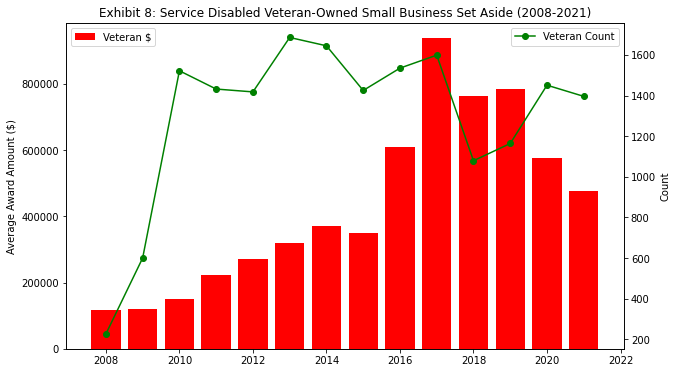

In [40]:
plt.figure(figsize=(10,6))
veteran_award_amounts = plt.bar(SDVOSB_df5["period_of_performance_start_date"], SDVOSB_df5["Average Award Amount"], color="r", label="Veteran $")
plt.ylabel("Average Award Amount ($)")
plt.legend(loc="upper left")

plt.twinx()
veteran_counts = plt.plot(SDVOSB_df5["period_of_performance_start_date"], SDVOSB_df5["Count"], "o-", color="g", label="Veteran Count")
plt.ylabel("Count")
plt.legend()

plt.title("Exhibit 8: Service Disabled Veteran-Owned Small Business Set Aside (2008-2021)")

Text(0.5, 1.0, 'Exhibit 9: Small Business Set Aside - Total (2008-2021)')

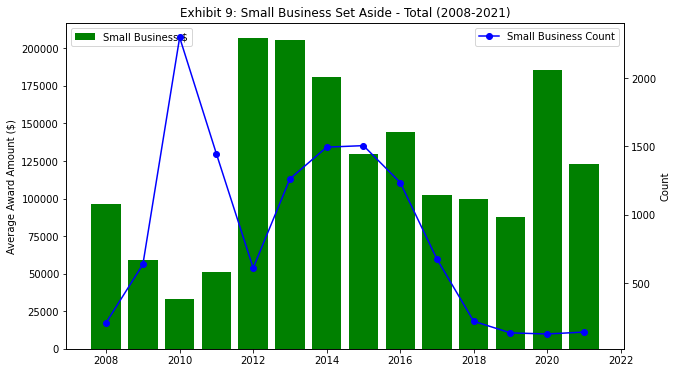

In [41]:
plt.figure(figsize=(10,6))
small_business_award_amounts = plt.bar(small_business_total_df5["period_of_performance_start_date"], small_business_total_df5["Average Award Amount"], color="g", label="Small Business $")
plt.ylabel("Average Award Amount ($)")
plt.legend(loc="upper left")

plt.twinx()
small_business_counts = plt.plot(small_business_total_df5["period_of_performance_start_date"], small_business_total_df5["Count"], "o-", color="b", label="Small Business Count")
plt.ylabel("Count")
plt.legend()

plt.title("Exhibit 9: Small Business Set Aside - Total (2008-2021)")

Text(0.5, 1.0, 'Exhibit 10: Service Disabled Veteran-Owned Small Business Sole Source (2008-2021)')

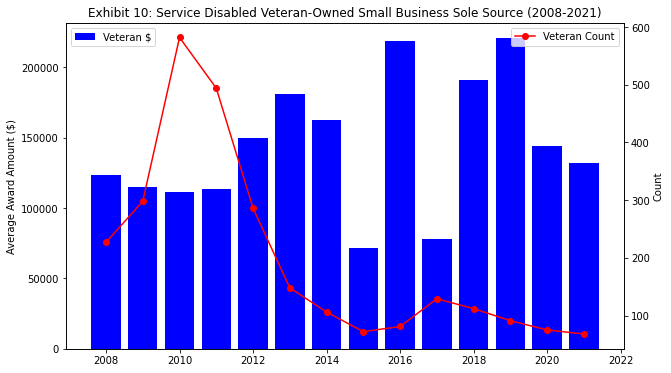

In [42]:
plt.figure(figsize=(10,6))
veteran_award_amounts = plt.bar(SDVOSB_sole_source_df5["period_of_performance_start_date"], SDVOSB_sole_source_df5["Average Award Amount"], color="b", label="Veteran $")
plt.ylabel("Average Award Amount ($)")
plt.legend(loc="upper left")

plt.twinx()
veteran_counts = plt.plot(SDVOSB_sole_source_df5["period_of_performance_start_date"], SDVOSB_sole_source_df5["Count"], "o-", color="r", label="Veteran Count")
plt.ylabel("Count")
plt.legend()

plt.title("Exhibit 10: Service Disabled Veteran-Owned Small Business Sole Source (2008-2021)")

Text(0.5, 1.0, 'Exhibit 11: Veteran Set Aside (2008-2021)')

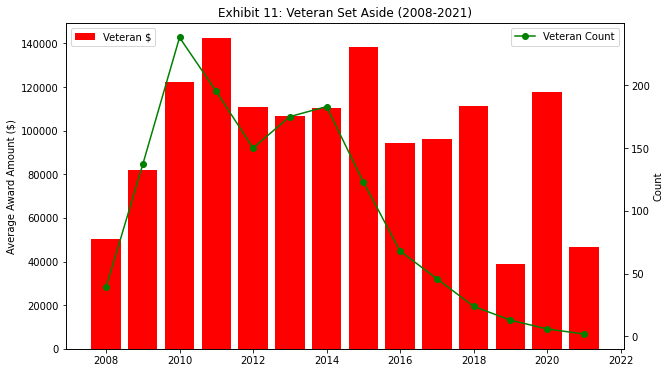

In [43]:
plt.figure(figsize=(10,6))
veteran_award_amounts = plt.bar(veteran_df5["period_of_performance_start_date"], veteran_df5["Average Award Amount"], color="r", label="Veteran $")
plt.ylabel("Average Award Amount ($)")
plt.legend(loc="upper left")

plt.twinx()
veteran_counts = plt.plot(veteran_df5["period_of_performance_start_date"], veteran_df5["Count"], "o-", color="g", label="Veteran Count")
plt.ylabel("Count")
plt.legend()

plt.title("Exhibit 11: Veteran Set Aside (2008-2021)")

Text(0.5, 1.0, 'Exhibit 12: Small Business Set Aside - Partial (2008-2021)')

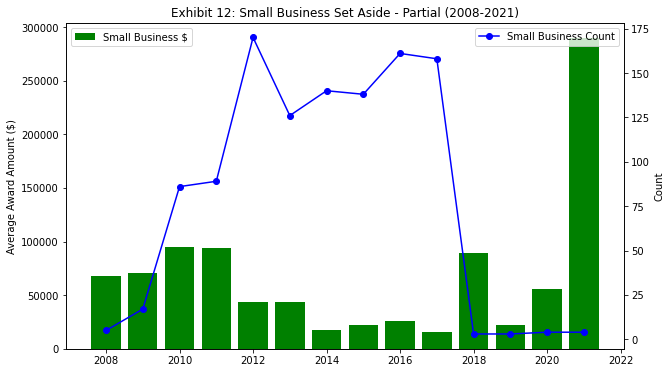

In [44]:
plt.figure(figsize=(10,6))
small_business_award_amounts = plt.bar(small_business_partial_df5["period_of_performance_start_date"], small_business_partial_df5["Average Award Amount"], color="g", label="Small Business $")
plt.ylabel("Average Award Amount ($)")
plt.legend(loc="upper left")

plt.twinx()
small_business_counts = plt.plot(small_business_partial_df5["period_of_performance_start_date"], small_business_partial_df5["Count"], "o-", color="b", label="Small Business Count")
plt.ylabel("Count")
plt.legend()

plt.title("Exhibit 12: Small Business Set Aside - Partial (2008-2021)")